In [43]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("dataCOMP0050Coursework1.csv")

## Data Augmentation

We need to first clean the data.

1. Look at the number of unique values and remove columns that only contain one unique value. 
2. Remove columns that have a low variance 

In [7]:
print(df.nunique())

loan_amnt                666
term                       2
installment             5652
emp_length                11
home_ownership             3
verification_status        3
issue_d                  120
purpose                    1
dti                     3030
earliest_cr_line          55
open_acc                  41
pub_rec                   10
revol_util              1018
total_acc                 77
application_type           2
mort_acc                  17
pub_rec_bankruptcies       7
log_annual_inc          1474
fico_score                38
log_revol_bal           7031
charged_off                2
dtype: int64


0       36
1       36
2       36
3       36
4       36
        ..
8924    36
8925    60
8926    36
8927    36
8928    60
Name: term, Length: 8929, dtype: int64


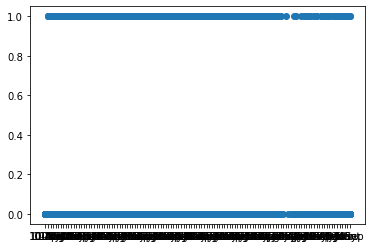

In [38]:
print(df['term'])
plt.scatter(np.sort(df['issue_d']), df['charged_off'])

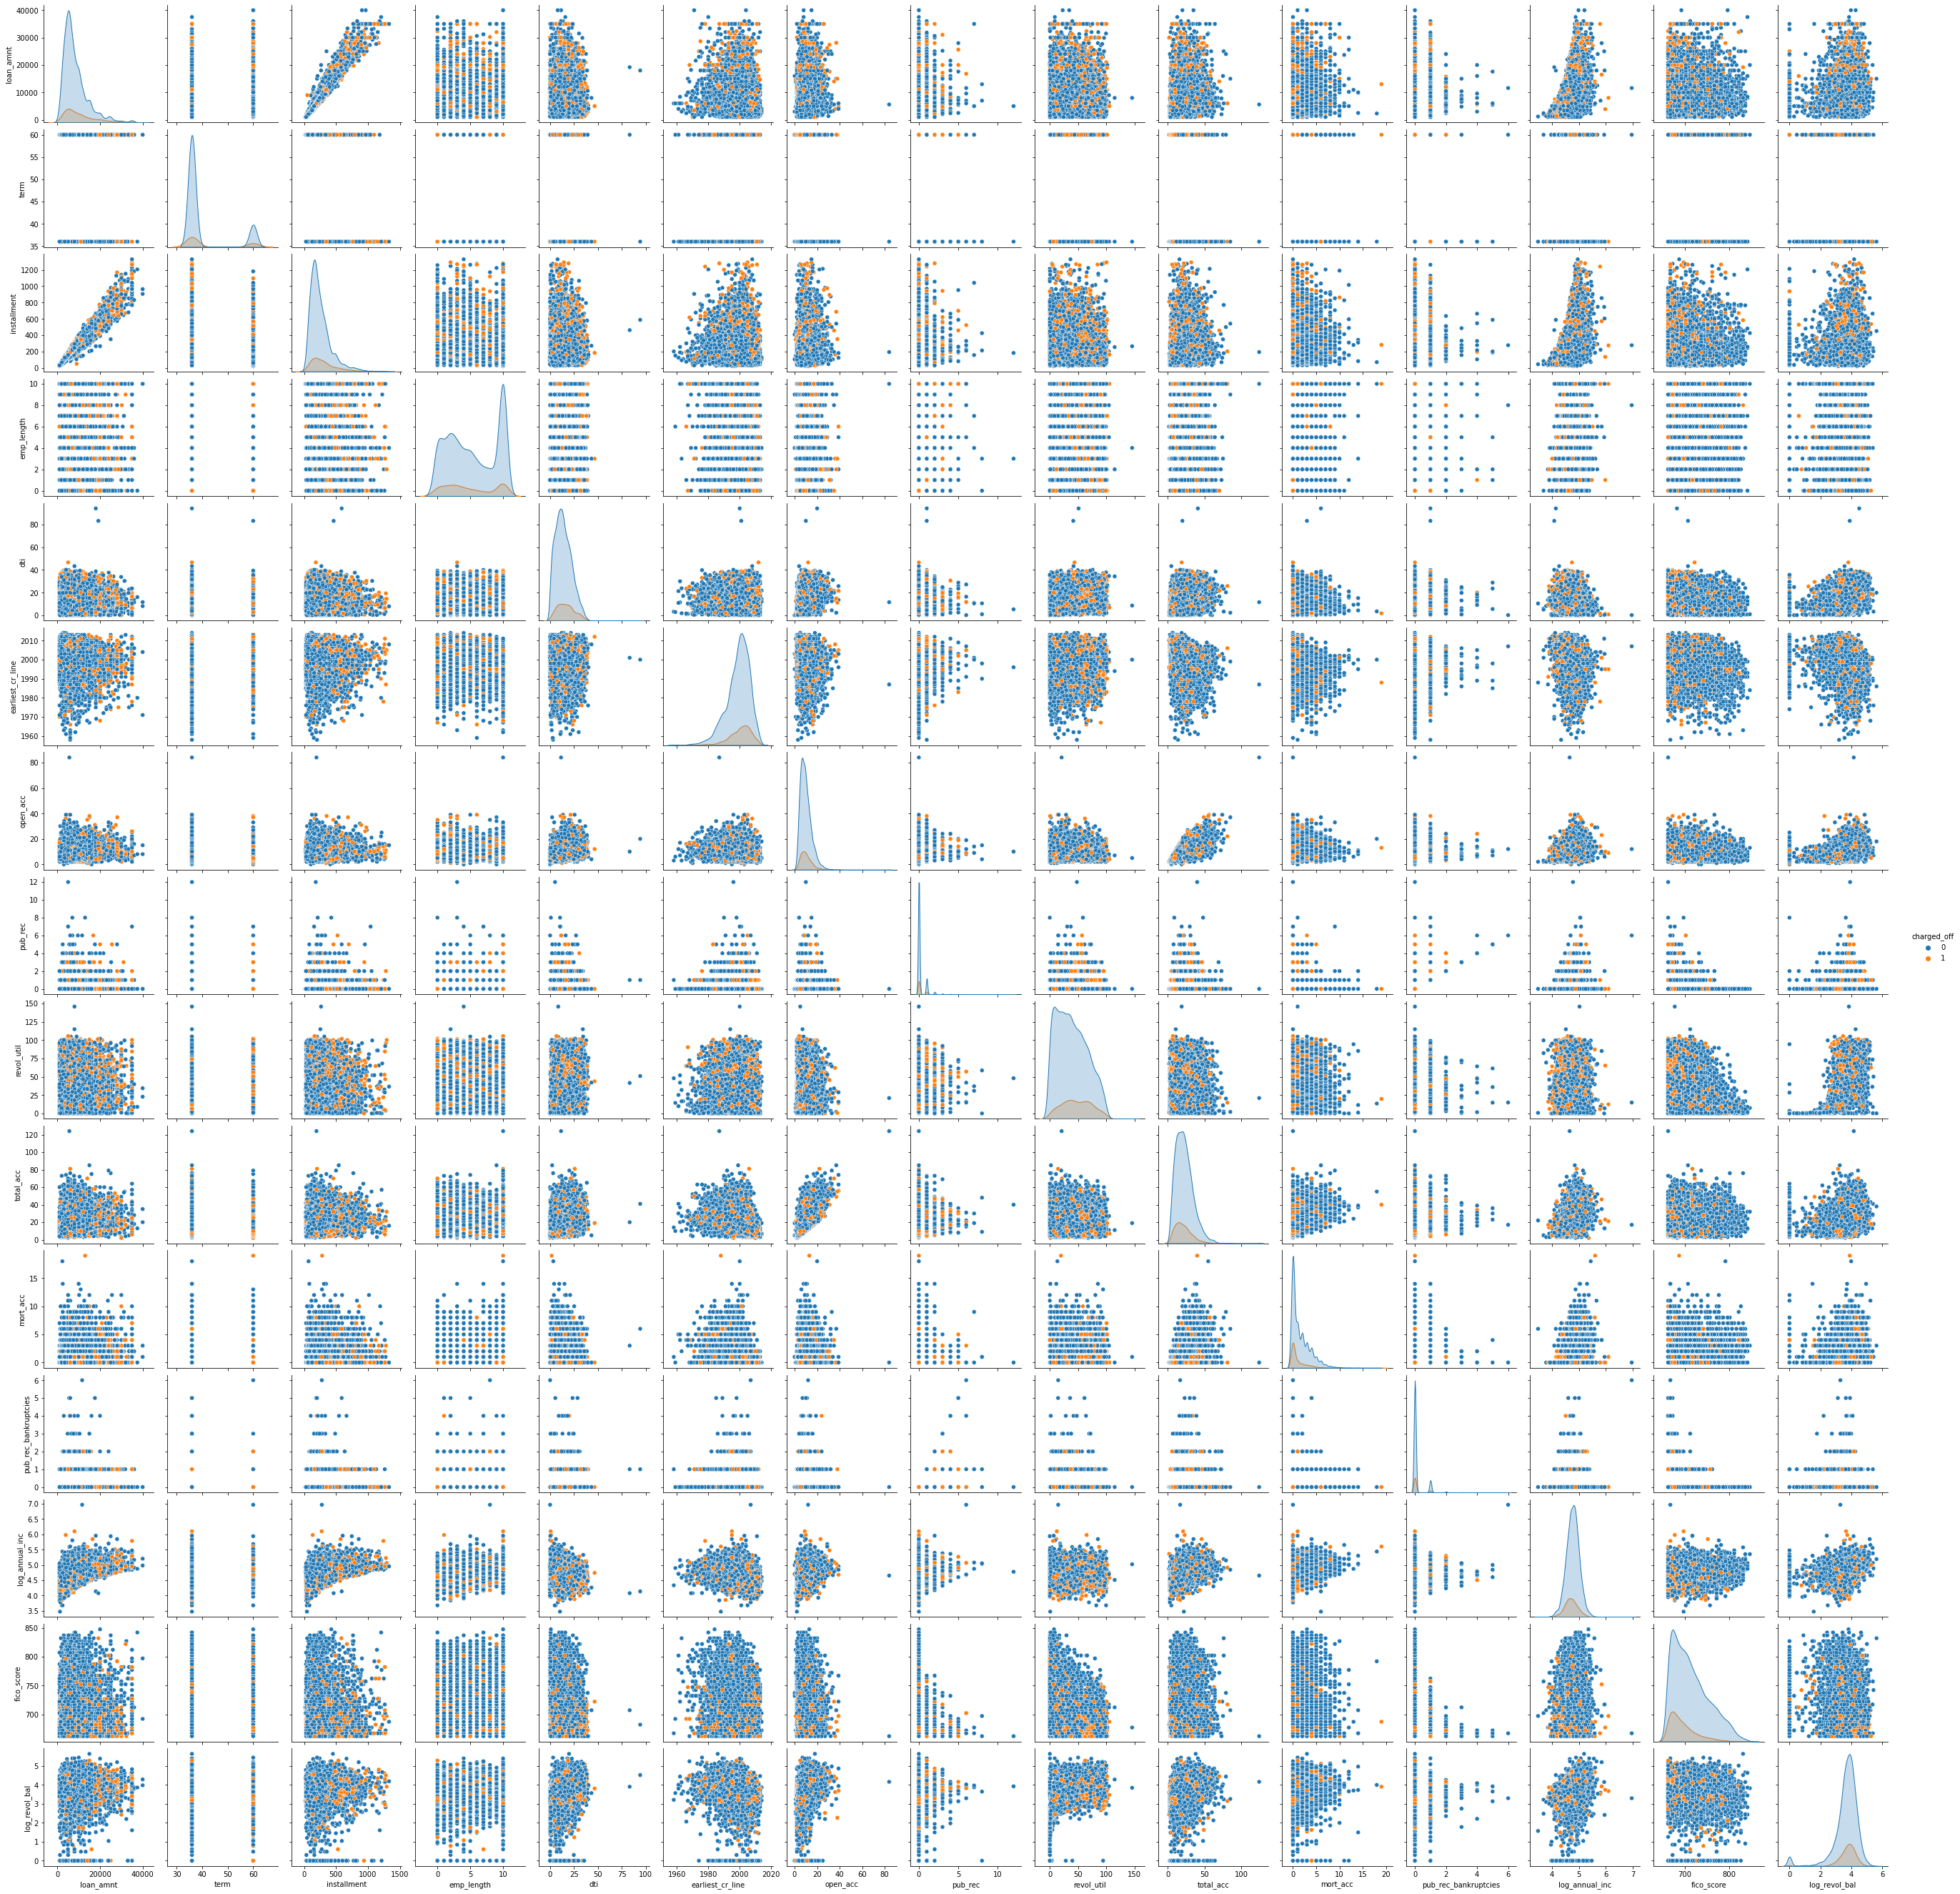

In [28]:
sns.pairplot(df, hue='charged_off')

### Checking variance of numerical columns

In [9]:
num_cols = df.select_dtypes(include=np.number)
pd.DataFrame(num_cols)

loan_amnt  term  installment  emp_length    dti  earliest_cr_line  \
0          5675    36       189.56         2.0  15.55              1992   
1          7000    36       242.63         1.0   6.78              2002   
2          3500    36       116.24        10.0  10.65              1997   
3         10000    36       316.47        10.0  21.74              1996   
4          1500    36        46.31         2.0  12.17              1997   
...         ...   ...          ...         ...    ...               ...   
8924       1000    36        31.30         8.0  10.82              1992   
8925      10000    60       216.33        10.0  15.58              2002   
8926      25000    36       864.80         5.0   3.83              2002   
8927      16000    36       546.77        10.0  26.20              1988   
8928      20000    60       513.22        10.0  10.32              2005   

      open_acc  pub_rec  revol_util  total_acc  mort_acc  \
0            7        0        15.0         15       0.0   
1            3        0        69.2          5       0.0   
2           16        0        12.6         35       2.0   
3            7        0        23.7         22       4.0   
4            8        0        46.5         13       2.0   
...        ...      ...         ...        ...       ...   
8924         6        0        40.0         26       1.0   
8925        11        0        30.9         33       3.0   
8926        10        0        57.7         17       0.0   
8927        26        0        62.0         43       4.0   
8928         5        0        30.4         10       0.0   

      pub_rec_bankruptcies  log_annual_inc  fico_score  log_revol_bal  \
0                      0.0        4.698979       697.0       3.464936   
1                      0.0        4.301052       717.0       3.431364   
2                      0.0        4.681250       742.0       3.765520   
3                      0.0        4.875067       707.0       3.424555   
4                      0.0        4.812920       712.0       4.448211   
...                    ...             ...         ...            ...   
8924                   0.0        4.929424       762.0       3.602277   
8925                   0.0        5.025310       707.0       4.189462   
8926                   0.0        4.944488       677.0       3.897902   
8927                   0.0        5.243041       682.0       5.076957   
8928                   0.0        4.875067       677.0       3.026942   

      charged_off  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
8924            0  
8925            0  
8926            0  
8927            0  
8928            1  

[8929 rows x 16 columns]

Here we are removing columns with zero variance first

(8929, 15) (8929,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
>Threshold=0.00, Features=15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
>Threshold=0.05, Features=15
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
>Threshold=0.10, Features=14
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.15, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.20, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.25, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.30, Features=13
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.35, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.40, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.45, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.50, Features=12


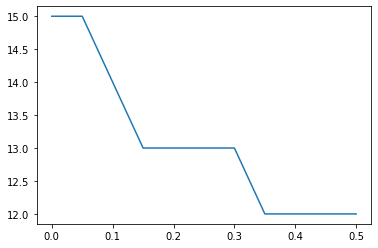

In [10]:
# split data into inputs and outputs
data = pd.DataFrame(num_cols).values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    print(transform.get_support(indices=True))
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

Here we are trying to get rid of columns that have variance lower than a certain threshold.  

In [11]:
 def variance_threshold_selector(data, t=0.5):
    data = pd.DataFrame(data).values
    X = data[:, :-1]
    y = data[:, -1]
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    X = pd.DataFrame(X)
    return transform.get_support(indices=True)

In [12]:
sel_cols = variance_threshold_selector(num_cols, 0.2)

In [13]:
#Split into numerical features and label 
X = num_cols.iloc[:, :-1]
y = num_cols.iloc[:, -1]

X = X.iloc[:, sel_cols]

Below our threshold of 0.2, we find that we can ignore the log_annual_inc and pub_rec_bankrupties features.  

In [14]:
np.std(num_cols['log_annual_inc'])**2

0.0610838656616725

In [15]:
np.std(num_cols['pub_rec_bankruptcies'])**2

0.1479714177160926

In [16]:
df.isnull().sum()

loan_amnt                  0
term                       0
installment                0
emp_length               425
home_ownership             0
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_util                14
total_acc                  0
application_type           0
mort_acc                1756
pub_rec_bankruptcies      17
log_annual_inc             0
fico_score                 0
log_revol_bal              0
charged_off                0
dtype: int64

In [17]:
#Checking for duplicates

df.duplicated().sum()

0

In [18]:
X.isnull().sum()

loan_amnt              0
term                   0
installment            0
emp_length           425
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_util            14
total_acc              0
mort_acc            1756
fico_score             0
log_revol_bal          0
dtype: int64

In [19]:
X['emp_length'].fillna(10,inplace=True)
X['mort_acc'].fillna(0, inplace=True)
X['revol_util'].fillna(X['revol_util'].median(), inplace=True)

In [20]:
X.isnull().sum()

loan_amnt           0
term                0
installment         0
emp_length          0
dti                 0
earliest_cr_line    0
open_acc            0
pub_rec             0
revol_util          0
total_acc           0
mort_acc            0
fico_score          0
log_revol_bal       0
dtype: int64

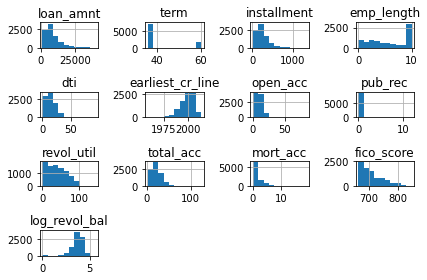

In [23]:
X.hist()
plt.yscale('log')
plt.tight_layout()

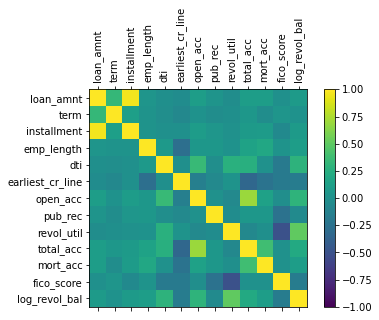

In [26]:
names = X.columns
correlations = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)
plt.show()

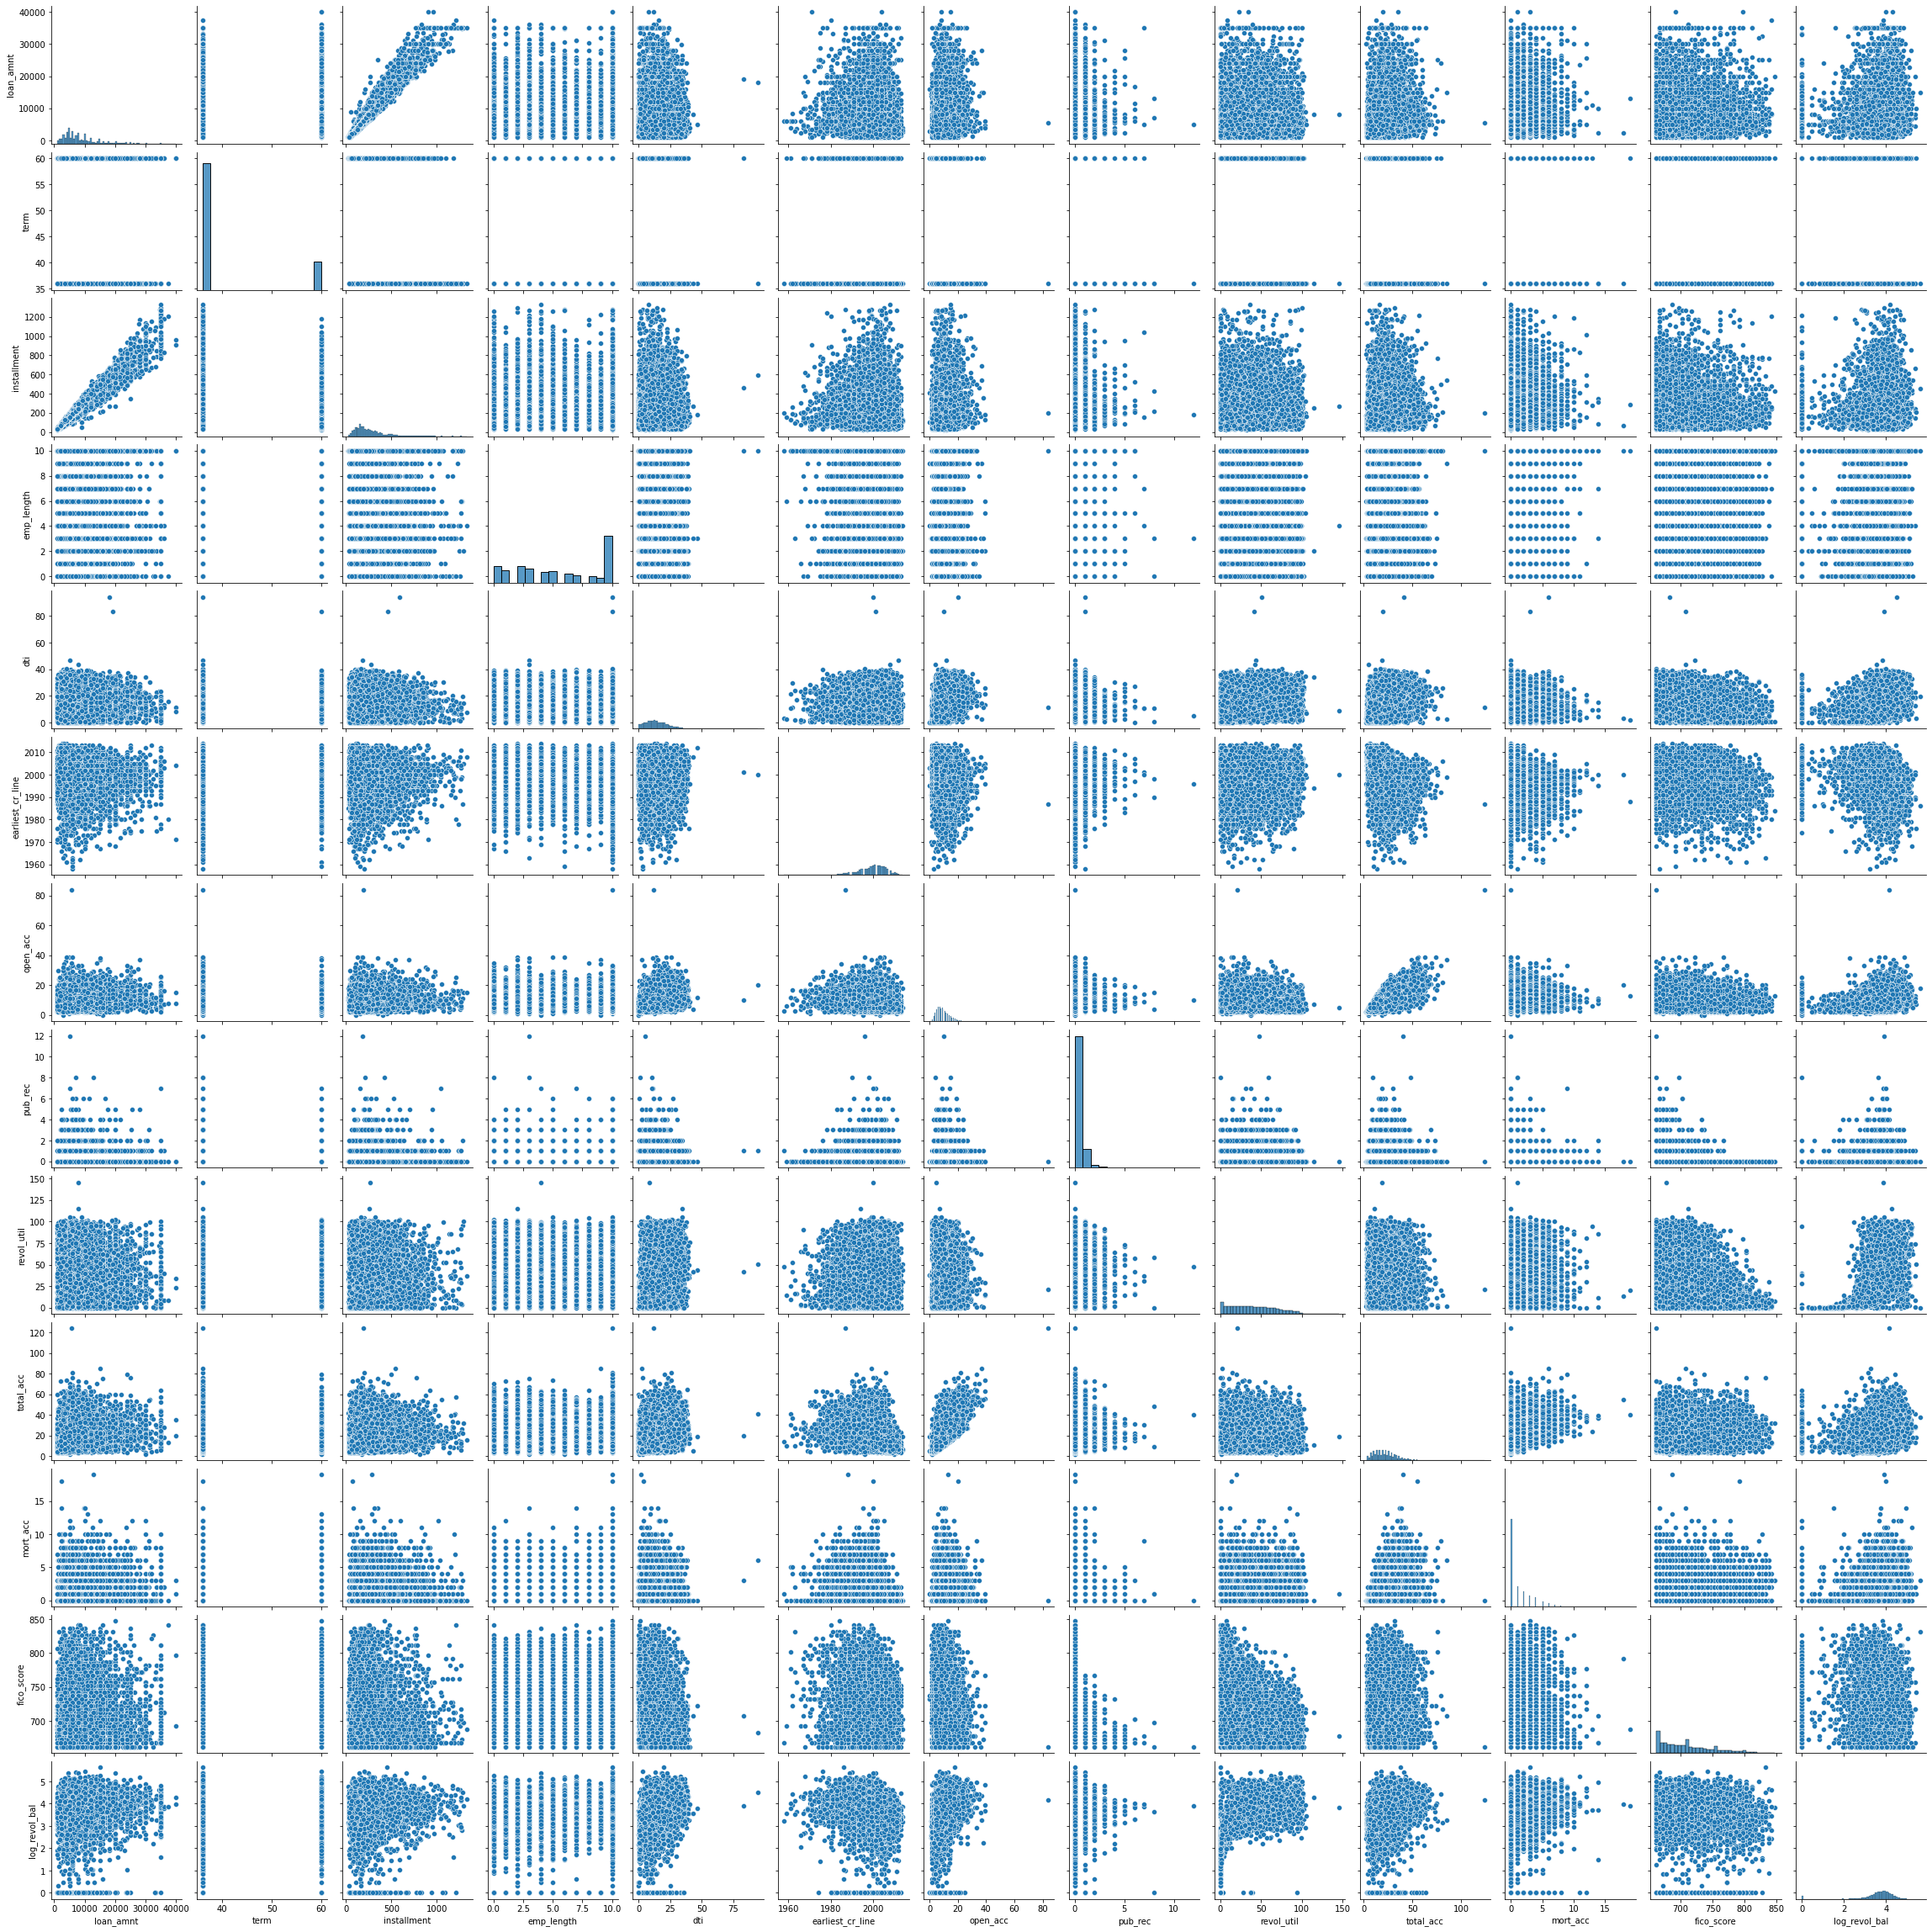

In [27]:
sns.pairplot(X)

### We now need to standardise our data 

This makes gradient descent much more efficient. 

In [33]:
scaler = StandardScaler()
X_scaled = X
X_scaled[X.columns] = scaler.fit_transform(X[X.columns])

In [39]:
X = X_scaled

### Time to build our decision tree algorithm

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [79]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8460246360582306


In [81]:
y_train.unique()

array([0, 1], dtype=int64)

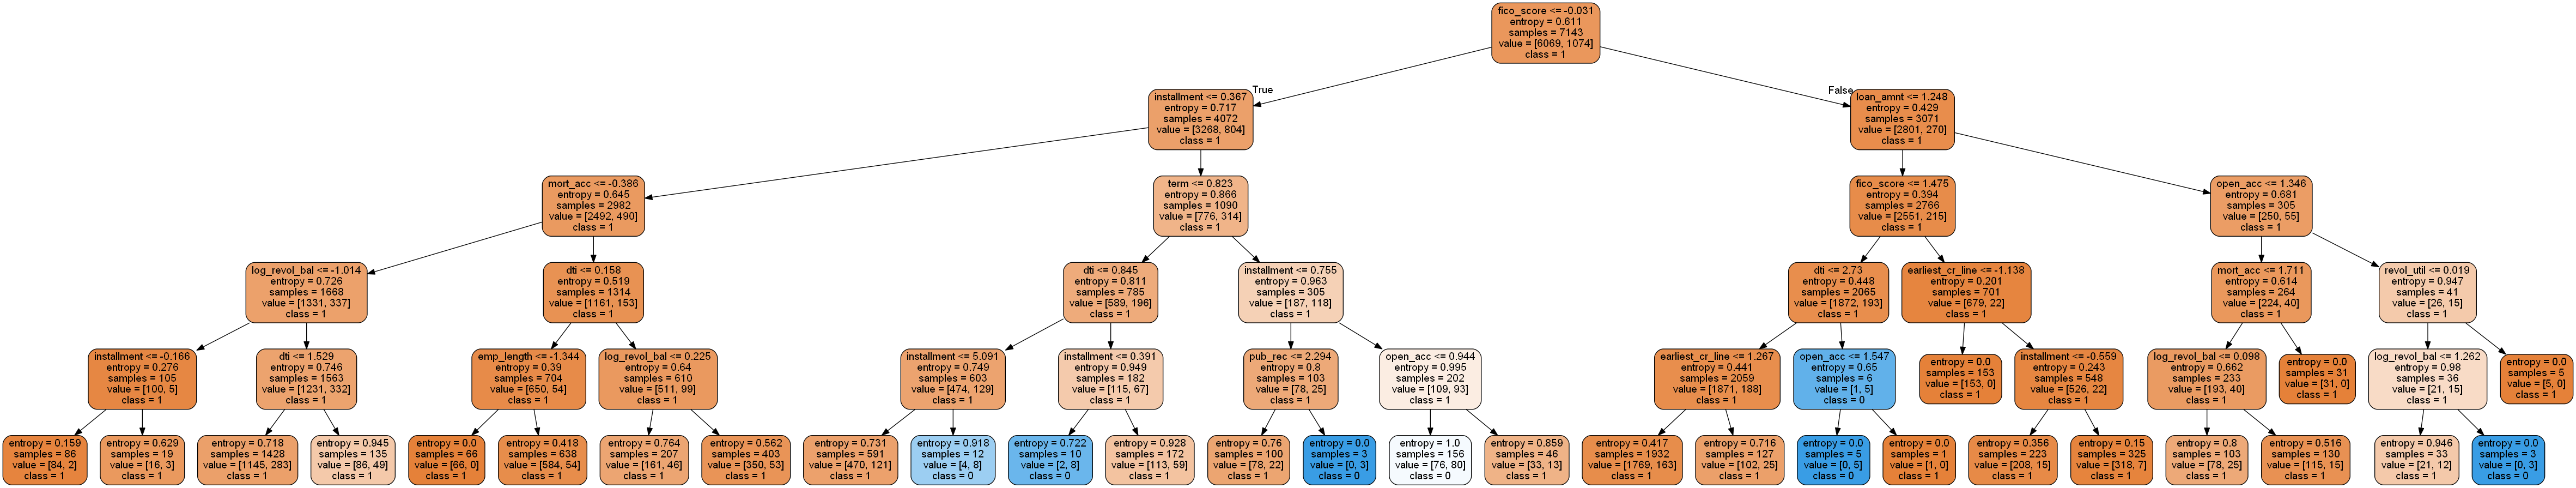

In [82]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = X.columns,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())